In [1]:
import functions as fu
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

import sparse as sp
from scipy.optimize import curve_fit

## Close to the critical point

In [2]:
# Parametri
N_values = np.arange(2, 14, 1)  # Numero totale di spin (deve essere pari)
loc_dim = 2  # Dimensione locale per ogni spin
# l_values = np.linspace(0.5, 2.0, 50)  # Valori di λ

l = 0.9

l_critical = [0.6135347926800416, 0.6796124191837966, 0.7304964175730098, 0.7665184505949523, 0.7946959596847979, 0.8140540969222221, 0.8338837823948374, 0.849072399435249, 0.8593515294897932, 0.869755101835417, 0.8802846230085422]

entropies = sp.entropy(N_values, l, loc_dim)

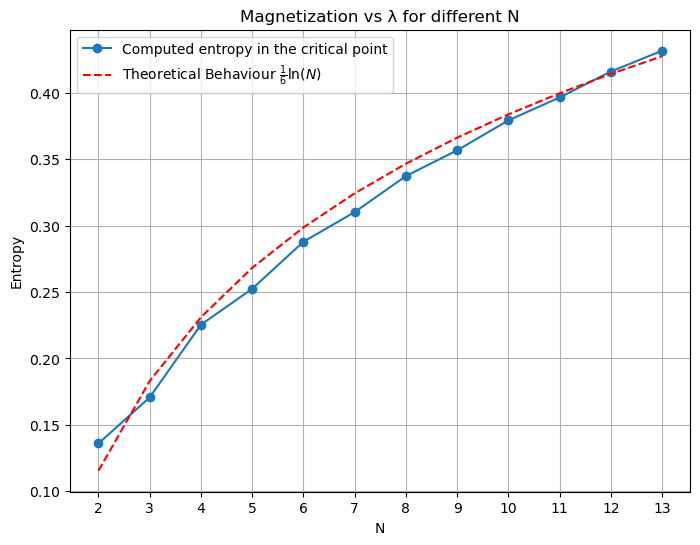

In [3]:
plt.figure(figsize=(8, 6))

y_theoretical = (1/6) * np.log(N_values)

plt.plot(N_values, entropies, '-o', label = "Computed entropy in the critical point")
plt.plot(N_values, y_theoretical, 'r--', label=r"Theoretical Behaviour $\frac{1}{6} \ln(N)$")


# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
# plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('N')
plt.ylabel('Entropy')
plt.title('Magnetization vs λ for different N')
x_min, x_max = min(N_values), max(N_values)  # Trova il range dei tuoi dati N_vals
plt.xticks(np.arange(x_min, x_max + 1, 1))  # Ticks da x_min a x_max con passo di 1
plt.legend()
plt.grid()
plt.show()

0.49203914210935157
Fitted parameters:
 c = 0.4920


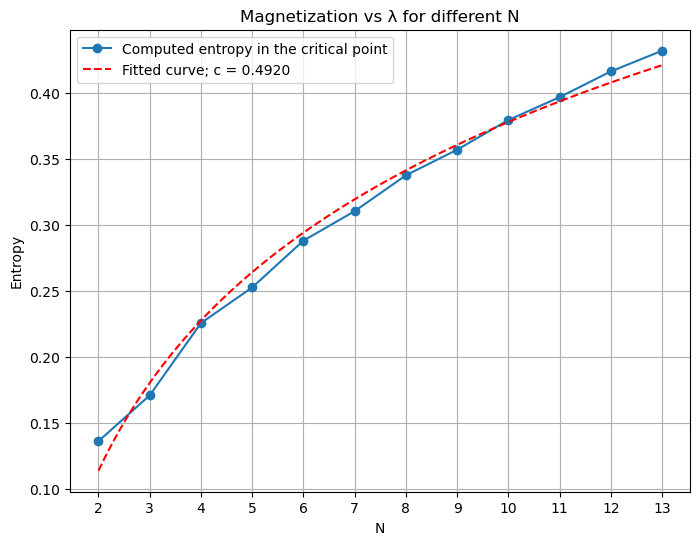

In [4]:
def target_function(x, c):
    return c/3 * np.log(x)


initial_guess = [0.5]
    
params, _ = curve_fit(target_function, N_values, entropies, p0=initial_guess)
c = params[0]

print(c)
    

print(f"Fitted parameters:\n c = {c:.4f}")

s_vals = np.linspace(2, 13, 100)
fitted = target_function(s_vals, c)


plt.figure(figsize=(8, 6))

y_theoretical = (1/6) * np.log(N_values)

plt.plot(N_values, entropies, '-o', label = "Computed entropy in the critical point")
plt.plot(s_vals, fitted, 'r--', label=f"Fitted curve; c = {c:.4f}")


# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
# plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('N')
plt.ylabel('Entropy')
plt.title('Magnetization vs λ for different N')
x_min, x_max = min(N_values), max(N_values)  # Trova il range dei tuoi dati N_vals
plt.xticks(np.arange(x_min, x_max + 1, 1))  # Ticks da x_min a x_max con passo di 1
plt.legend()
plt.grid()
plt.show()


## Varying lambda

entropy vs $\lambda$. <br>

- For $\lambda >> 1$ or $\lambda << 1$: separable state and entropy close to 0, and entanglement is minimum
- For $\lambda \simeq 1$: generale state and entropy close to 0, and entanglement is maximum


In [ ]:
N_vals = [8,9,10,11,12]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(2, -2, 200)
loc_dim = 2


entropies_total = []


for N in N_vals:
    print(N)
    entropy_Ni = []

    for l in l_vals:
        N = int(N)
        # Costruzione dell'Hamiltoniano
        H = sp.ising_hamiltonian(N, l)

        # Calcolo del ground state
        eigval, eigvec = eigsh(H, k=1, which='SA')
        ground_state = eigvec[:, 0]

        rho = np.outer(ground_state, np.conj(ground_state))


        keep_indices = list(range(N // 2))  # Mantengo i primi N/2 spin
        rhoA = sp.get_reduced_density_matrix(ground_state, loc_dim, N, keep_indices)


        # SVD per ottenere i valori singolari
        U, Lambda, Vh = np.linalg.svd(rho, full_matrices=False)

        # Calcolo dell'entropia di entanglement
        entropy = -np.sum(Lambda**2 * np.log(Lambda**2))

        entropy_Ni.append(entropy)
    
    entropies_total.append(entropy_Ni)

8


NameError: name 'get_reduced_density_matrix' is not defined

For N = 8, Maximum entropy at λ = 0.0401
For N = 9, Maximum entropy at λ = 0.0608
For N = 10, Maximum entropy at λ = 0.0732
For N = 11, Maximum entropy at λ = 0.0966
For N = 12, Maximum entropy at λ = 0.1110


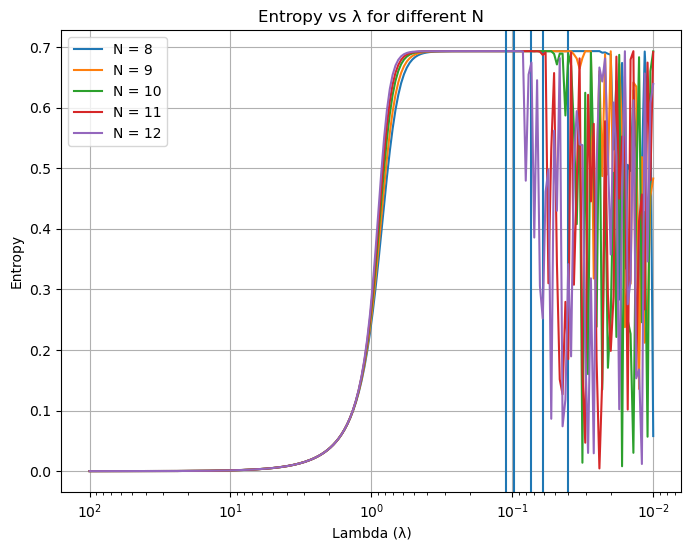

In [ ]:
plt.figure(figsize=(8, 6))

max_lambda_values = [] 

for i, entr in enumerate(entropies_total): 
    max_index = np.argmax(entr)
    
    # Trova il corrispondente valore di l_vals
    max_lambda = l_vals[max_index]
    max_lambda_values.append(max_lambda)
    
    # Stampa il risultato
    print(f"For N = {i+8}, Maximum entropy at λ = {max_lambda:.4f}")

    plt.plot(l_vals, entr, label=f'N = {i+8}')
    plt.axvline(x=max_lambda)

plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Entropy')
plt.title('Entropy vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()
